In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import scipy.integrate as integrate
import os
import theoryLya as tLya
import Spectrograph as spectrograph
import Survey as survey
import effectiveStatistics as effStats

os.environ['PATH'] = '/global/common/sw/cray/sles15/x86_64/texlive/live/gcc/8.2.0/tiozj27/bin/x86_64-linux/:{}'.format(os.environ['PATH'])

from matplotlib import rc
import matplotlib.cm as cm
rc('font',**{'size':'20','family':'serif','serif':['CMU serif']})
rc('mathtext', **{'fontset':'cm'})
rc('text', usetex=True)
rc('legend',**{'fontsize':'13'})

import camb
from camb import model, initialpower

In [2]:
theory=tLya.theoryLya()

In [3]:
ks = np.logspace(-3, 0)

In [4]:
theory.FluxP3D_McD2003_hMpc(z=np.array([1,2]), k_hMpc=.1, mu=1)

array([16.67151502, 77.825488  ])

Plotting the 3D power spectrum from McDonald (2003)

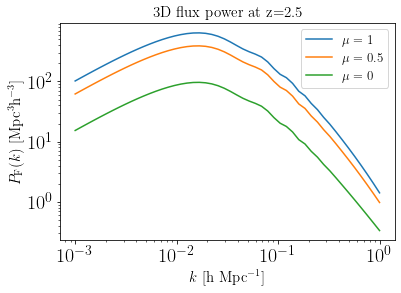

In [5]:
z = 2.5
plt.loglog(ks, theory.FluxP3D_McD2003_hMpc(z=z, k_hMpc=ks, mu=1), label='$\mu = 1$')
plt.loglog(ks, theory.FluxP3D_McD2003_hMpc(z=z, k_hMpc=ks, mu=0.8), label='$\mu = 0.5$')
plt.loglog(ks, theory.FluxP3D_McD2003_hMpc(z=z, k_hMpc=ks, mu=0), label='$\mu = 0$')
plt.xlabel(r'$k$ [h $\rm{Mpc}^{-1}$]',fontsize=15)
plt.ylabel(r'$P_{\rm{F}}(k)$ [$\rm{Mpc}^3 \rm{h}^{-3}$]',fontsize=15)
plt.title(r'3D flux power at z='+str(z),fontsize=15)
plt.legend()
plt.show()

Plotting the 1D power spectrum from P3D integrated McDonald (2003) and Palanque-Delabrouille (2013)

/global/u2/n/nishant/DESI2_LyaProjections/DESI-II-lyaforecast/build/lib/theoryLya.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  p1d[i] = integrate.quad(integrand, 0, np.inf)[0]


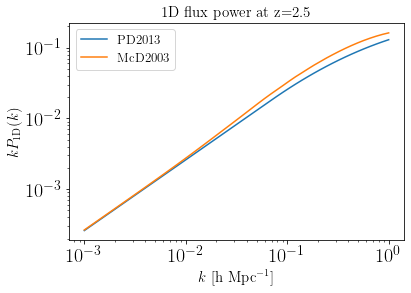

In [6]:
plt.loglog(ks, ks*theory.FluxP1D_PD2013_hMpc(z=z, k_hMpc=ks), label='PD2013')
plt.loglog(ks, ks*theory.FluxP1D_McD2003_hMpc(z=z, k_hMpc=ks), label='McD2003')
#plt.plot(.15, .15*0.27, '.', markersize=14)
#plt.plot(.15, .15*0.19, '.', markersize=14)

plt.xlabel(r'$k$ [h $\rm{Mpc}^{-1}$]',fontsize=15)
plt.ylabel(r'$k P_{\rm{1D}}(k)$ ',fontsize=15)
plt.title(r'1D flux power at z='+str(z),fontsize=15)
plt.legend()
plt.show()

Example SNRs: We take the average SNR between the Lyman-$\alpha$ and Lyman-$\beta$ to be the SNR for that r-mag and z bin.

In [7]:
path = "/global/homes/n/nishant/DESI2_LyaProjections/DESI-II-lyaforecast/build/lib/desi_SNR/"
DESI_instrument = spectrograph.Spectrograph(theory, path)

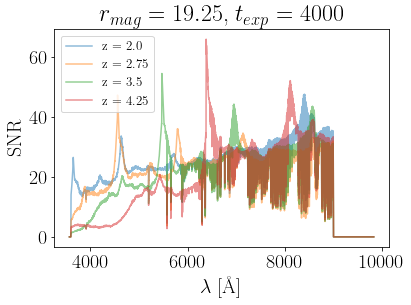

In [8]:
SNR, wavelengths, redshifts = DESI_instrument.openSNR('./desi_SNR/toto-r19.25-t4000-nexp4.dat')

plt.plot(wavelengths, SNR[:,0], label='z = ' + str(redshifts[0]), alpha=0.5)
plt.plot(wavelengths, SNR[:,3], label='z = ' + str(redshifts[3]), alpha=0.5)
plt.plot(wavelengths, SNR[:,6], label='z = ' + str(redshifts[6]), alpha=0.5)
plt.plot(wavelengths, SNR[:,9], label='z = ' + str(redshifts[9]), alpha=0.5)

plt.legend()
plt.xlabel(r'$\lambda$ [\AA]')
plt.ylabel('SNR')
plt.title('$r_{mag} = 19.25$, $t_{exp} = 4000$')
#plt.xlim(3570, 9020)
plt.show()

General Code Structure: to calculate relevant statistics, we must input a Spectrograph object, which has SNRs, a Survey object, which defines the z,mag bins, and a theory object with contains the power spectra. The theory object also inherits from a 'cosmo' object which has CAMB outputs.

In [9]:
DESI1_survey = survey.Survey(nzr_file='./nzs/nzr_qso.dat', survey_A=16000)

In [10]:
#survey area in sq degrees
DESI1 = effStats.effectiveStatistics(theory, DESI1_survey, DESI_instrument)

First show $\nu_n$ as it scales with z and t for each r-mag.

In [11]:
DESI1.v_n(4000, 19.25, 2, k=0.1, SNR=2)

0.2574815057546773

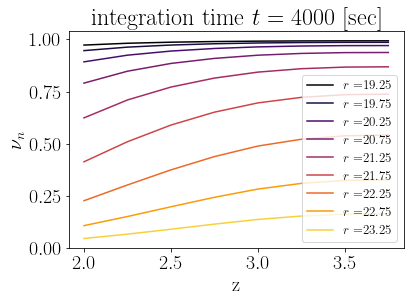

In [12]:
r_range = np.arange(19.25, 23.75, .5)
for i, r in enumerate(r_range):
    plt.plot(np.arange(2, 4, .25), DESI1.v_n(4000, r, np.arange(2, 4, .25), k=0.1), color=plt.cm.inferno(i/(len(r_range))), label=r'$r = $' + str(r))
plt.legend()
plt.title(r'integration time $t = 4000$ [sec]')
plt.xlabel(r'z')
plt.ylabel(r'$\nu_{n}$')
plt.savefig('v_n_vs_z.pdf', bbox_inches='tight')
plt.show()


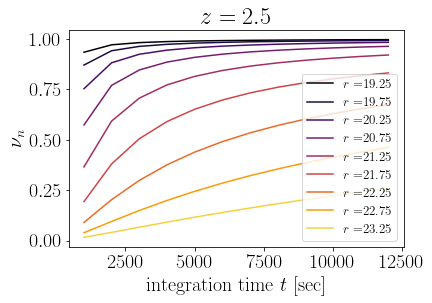

In [13]:
r_range = np.arange(19.25, 23.75, .5)
for i, r in enumerate(r_range):
    plt.plot(np.arange(1000,13000,1000), DESI1.v_n(np.arange(1000,13000,1000), r, 2.5, k=0.1), color=plt.cm.inferno(i/(len(r_range))), label=r'$r = $' + str(r))
plt.legend()
plt.title(r'$z=2.5$')
plt.xlabel(r'integration time $t$ [sec]')
plt.ylabel(r'$\nu_{n}$')
plt.savefig('v_n_vs_t.pdf', bbox_inches='tight')

plt.show()

In [14]:
DESI1.v_n(4000, 19.25, 2, k=0.1, SNR=2)

0.2574815057546773

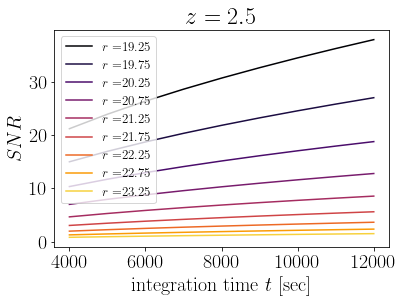

In [15]:
r_range = np.arange(19.25, 23.75, .5)
for i, r in enumerate(r_range):
    plt.plot(np.arange(4000,13000,1000), (DESI1.Spectrograph.snr(np.arange(4000,13000,1000), r, 2.5)), color=plt.cm.inferno(i/(len(r_range))), label=r'$r = $' + str(r))
plt.legend()
plt.title(r'$z=2.5$')
plt.xlabel(r'integration time $t$ [sec]')
plt.ylabel(r'$SNR$')
plt.savefig('v_n_vs_t.pdf', bbox_inches='tight')

plt.show()

From here, most of the plots have a corresponding comparison in Julien's slides.

In [16]:
volume = DESI1.theoryLya.cosmo.V(DESI1.Survey.z_bins, DESI1.Survey.surveyArea, DESI1.Survey.dz) 

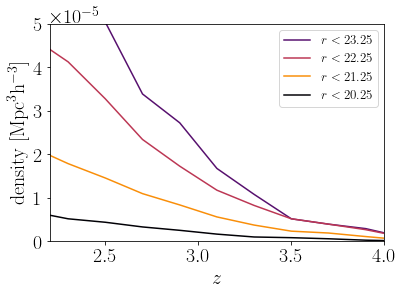

In [17]:
plt.plot(DESI1.Survey.z_bins, DESI1.Survey.nzr[:, DESI1.Survey.r_bins < 23.25].sum(axis=1)*DESI1.Survey.dz*DESI1.Survey.dr*DESI1.Survey.surveyArea/volume, color=plt.cm.inferno(.25), label=r'$r < 23.25$')
plt.plot(DESI1.Survey.z_bins, DESI1.Survey.nzr[:, DESI1.Survey.r_bins < 22.25].sum(axis=1)*DESI1.Survey.dz*DESI1.Survey.dr*DESI1.Survey.surveyArea/volume, color=plt.cm.inferno(.5), label=r'$r < 22.25$')
plt.plot(DESI1.Survey.z_bins, DESI1.Survey.nzr[:, DESI1.Survey.r_bins < 21.25].sum(axis=1)*DESI1.Survey.dz*DESI1.Survey.dr*DESI1.Survey.surveyArea/volume, color=plt.cm.inferno(.75), label=r'$r < 21.25$')
plt.plot(DESI1.Survey.z_bins, DESI1.Survey.nzr[:, DESI1.Survey.r_bins < 20.25].sum(axis=1)*DESI1.Survey.dz*DESI1.Survey.dr*DESI1.Survey.surveyArea/volume, color=plt.cm.inferno(1), label=r'$r < 20.25$')

plt.xlim(2.2,4)
plt.ylim(0,5e-5)
plt.ylabel(r'density [$\rm{Mpc}^3 \rm{h}^{-3}$]')
plt.xlabel(r'$z$')
plt.legend()
plt.savefig('density_vs_z.pdf', bbox_inches='tight')

plt.show()

Components of $\nu_n = \frac{P_{1D}}{P_{1D}+P_N}$

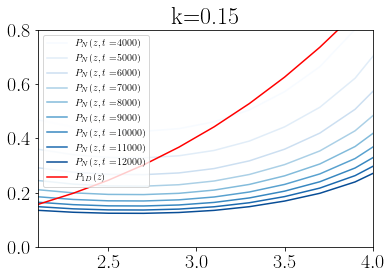

In [18]:
for i,t in enumerate(np.arange(4000,13000,1000)):
    plt.plot(DESI1.Survey.z_bins, DESI1.Spectrograph.P_Nn(t, 22.25, DESI1.Survey.z_bins), color=plt.cm.Blues(i/len(np.arange(4000,13000,1000))), label='$P_{N}(z,t=$' +str(t)+'$)$')

plt.title('k=0.15')
plt.plot(DESI1.Survey.z_bins,DESI1.theoryLya.FluxP1D_PD2013_hMpc(DESI1.Survey.z_bins, k_hMpc=0.15), color='r', label='$P_{1D}(z)$')
plt.xlim(2.1,4)
plt.ylim(0,.8)
plt.legend(fontsize=10)
plt.show()

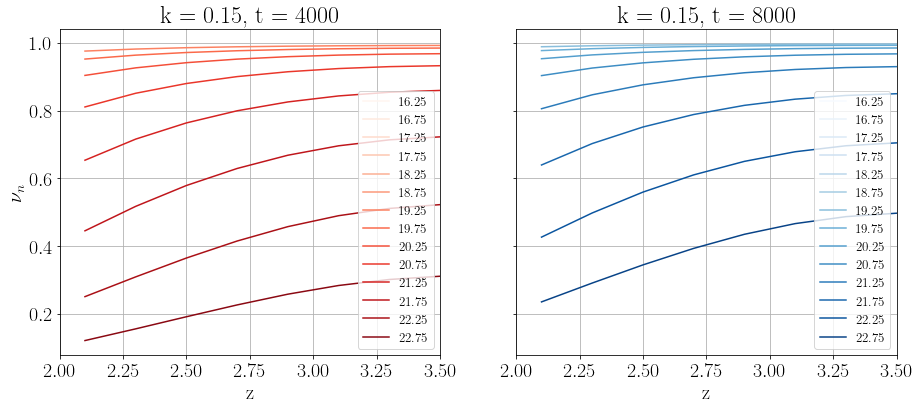

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,6))

for i,r in enumerate(DESI1.Survey.r_bins):
    ax1.plot(DESI1.Survey.z_bins, DESI1.v_n(4000, r, DESI1.Survey.z_bins, k=0.15), color=plt.cm.Reds(i/len(DESI1.Survey.r_bins)), label=str(r))
    ax2.plot(DESI1.Survey.z_bins, DESI1.v_n(8000, r, DESI1.Survey.z_bins, k=0.15), color=plt.cm.Blues(i/len(DESI1.Survey.r_bins)), label=str(r))

ax1.set_xlim(2,3.5)
ax2.set_xlim(2,3.5)
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

ax1.set_ylabel(r'$\nu_{n}$')
ax1.set_xlabel('z')
ax2.set_xlabel('z')

ax1.set_title('k = 0.15, t = 4000')
ax2.set_title('k = 0.15, t = 8000')


plt.show()

Next show n(z,r) from data file.

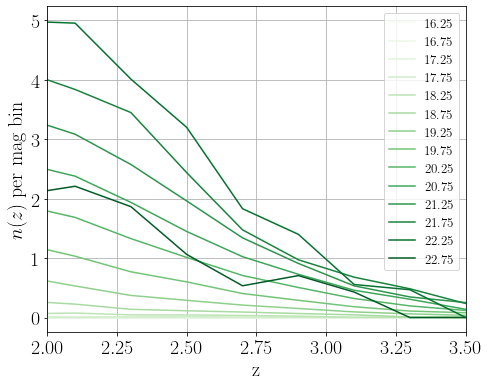

In [19]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(7.5,6))

for i,r in enumerate(DESI1.Survey.r_bins):
    ax1.plot(DESI1.Survey.z_bins, DESI1.Survey.nzr[:,i], color=plt.cm.Greens(i/len(DESI1.Survey.r_bins)), label=str(r))

plt.legend()
ax1.set_xlim(2,3.5)
ax1.grid()

ax1.set_ylabel(r'$n(z)$ per mag bin')
ax1.set_xlabel('z')
plt.show()

Next calculate $n_{eff}$, calculating a $\nu_n$ for each dz dmag bin and then multiplying by the QSO count in that bin. Plot below shows each dz bin on the x axis and each dmag bin as a different line. Left plot is original observation and right plot is re-observation.

In [21]:
t_range = np.arange(1000,13000,1000)
n_eff_trz = DESI1.n_eff_trz(k_val=0.15, t_range = np.arange(1000,13000,1000))

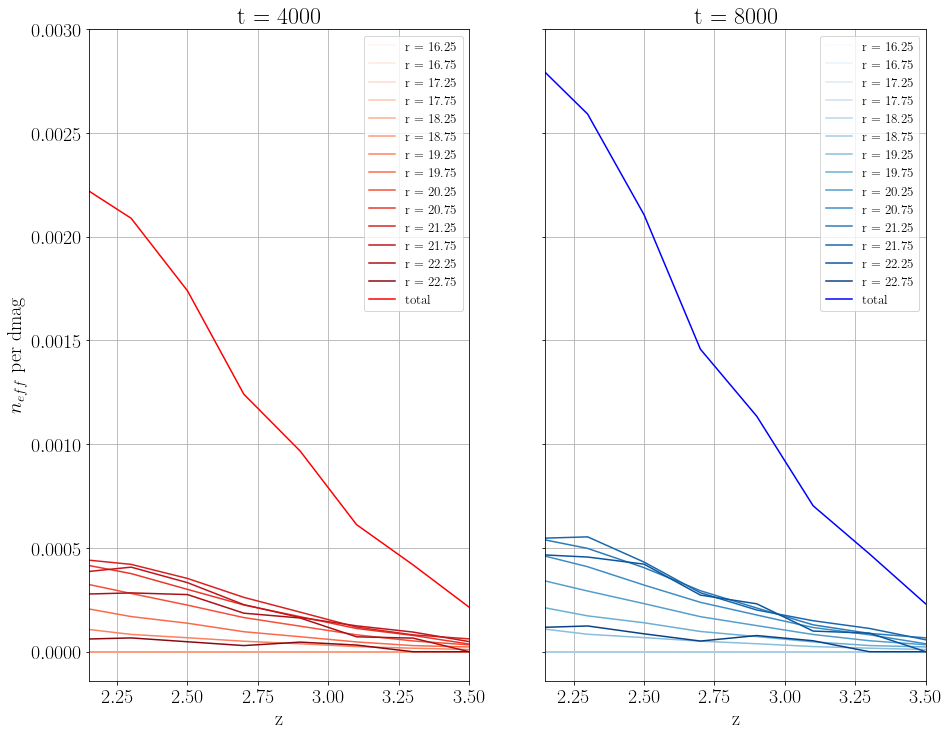

In [22]:

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,12))

for i,r in enumerate(DESI1.Survey.r_bins):
    ax1.plot(DESI1.Survey.z_bins, np.nan_to_num(n_eff_trz[3,i,:]), color=plt.cm.Reds(i/len(DESI1.Survey.r_bins)), label='r = ' + str(r))
    ax2.plot(DESI1.Survey.z_bins, np.nan_to_num(n_eff_trz[7,i,:]), color=plt.cm.Blues(i/len(DESI1.Survey.r_bins)), label='r = ' + str(r))

ax1.plot(DESI1.Survey.z_bins, np.nan_to_num(n_eff_trz[3,:,:]).sum(axis=0), color='r', label='total')
ax2.plot(DESI1.Survey.z_bins, np.nan_to_num(n_eff_trz[7,:,:]).sum(axis=0), color='b', label='total')

ax1.set_xlim(2.15,3.5)
ax2.set_xlim(2.15,3.5)

ax1.grid()
ax2.grid()

ax1.legend()
ax2.legend()

ax1.set_ylabel('$n_{eff}$ per dmag')
ax1.set_xlabel('z')
ax2.set_xlabel('z')

ax1.set_title('t = 4000')
ax2.set_title('t = 8000')

plt.show()

/tmp/ipykernel_17813/2148184673.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(DESI1.Survey.z_bins,DESI1.theoryLya.FluxP1D_PD2013_hMpc(DESI1.Survey.z_bins, k_hMpc=0.15) / (np.nan_to_num(n_eff_trz[3,:,:]).sum(axis=0)), label="$P_{LOS}/n_{eff}$, $t=4000$")
/tmp/ipykernel_17813/2148184673.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(DESI1.Survey.z_bins,DESI1.theoryLya.FluxP1D_PD2013_hMpc(DESI1.Survey.z_bins, k_hMpc=0.15) / (np.nan_to_num(n_eff_trz[7,:,:]).sum(axis=0)), label="$P_{LOS}/n_{eff}$, $t=8000$")


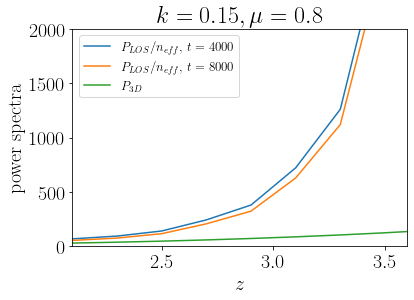

In [23]:

plt.plot(DESI1.Survey.z_bins,DESI1.theoryLya.FluxP1D_PD2013_hMpc(DESI1.Survey.z_bins, k_hMpc=0.15) / (np.nan_to_num(n_eff_trz[3,:,:]).sum(axis=0)), label="$P_{LOS}/n_{eff}$, $t=4000$")
plt.plot(DESI1.Survey.z_bins,DESI1.theoryLya.FluxP1D_PD2013_hMpc(DESI1.Survey.z_bins, k_hMpc=0.15) / (np.nan_to_num(n_eff_trz[7,:,:]).sum(axis=0)), label="$P_{LOS}/n_{eff}$, $t=8000$")

plt.plot(DESI1.Survey.z_bins,DESI1.theoryLya.FluxP3D_McD2003_hMpc(DESI1.Survey.z_bins, k_hMpc=0.15, mu=0.8), label='$P_{3D}$')
plt.xlim(2.1, 3.6)
plt.ylim(0,2000)
#plt.yscale('log')
#plt.ylabel(r'$n_{eff}$ [$\rm{Mpc}^3 \rm{h}^{-3}$]')
plt.xlabel(r'$z$')
plt.ylabel('power spectra')
#plt.legend()
#plt.savefig('n_eff_vs_z.pdf', bbox_inches='tight')
plt.title('$k=0.15, \mu=0.8$')
plt.legend()
plt.savefig('p_test.pdf', bbox_inches='tight')
plt.show()

In [24]:
ks = np.logspace(-3, 0)
mus = np.linspace(0,1,10)
V_eff = DESI1.V_eff_kmtrz(k=ks, mu=mus, n_eff_trz=n_eff_trz, k_los=0.15)

/global/u2/n/nishant/DESI2_LyaProjections/DESI-II-lyaforecast/build/lib/theoryLya.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  p1d[i] = integrate.quad(integrand, 0, np.inf)[0]
/global/u2/n/nishant/DESI2_LyaProjections/DESI-II-lyaforecast/build/lib/theoryLya.py:92: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  p1d[i] = integrate.quad(integrand, 0, np.inf)[0]
/global/u2/n/nishant/DESI2_LyaProjections/DESI-II-lyaforecast/build/lib/effectiveStatistics.py:59

In [25]:
V_temp = np.nan_to_num(V_eff[37,7,3,:,:]).sum(axis=0)
V2_temp = np.nan_to_num(V_eff[37,7,6,:,:]).sum(axis=0)

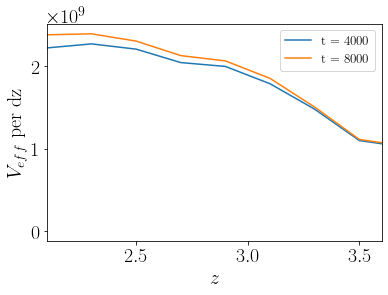

In [26]:
plt.plot(DESI1.Survey.z_bins,V_temp,label='t = 4000')
plt.plot(DESI1.Survey.z_bins,V2_temp,label='t = 8000')
plt.ylabel('$V_{eff}$ per dz')
plt.xlabel('$z$')
plt.xlim(2.1, 3.6)
plt.legend()
plt.show()


In [27]:
V2_temp.sum()/V_temp.sum()

1.0397413651252094